

# Project: No-show Doctor Appointments Data Analysis (In Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

#### The following dataset contains info about doctor appointments in Brazil. around 20% of patients miss their appiontments after booking. we have a dataset for more than 100K appointments from 29/4/2016 till 6/6/2016  and we want to explore the factors causing someone to miss their appointments.

##### Columns of the dataset: (14 columns)

1. Patient_Id

2. Appointment_ID

3. Gender: Male or Female

4. Scheduled_Date: The day someone booked the appointment

5. Appiontment_Date: The day of the actuall appointment

6. Age

7. Neighbourhood: Where the appointment takes place.

8. Scholarship: this indicates whether a patient has a scholarship or not (0 if they don't and 1 if the do)

9. Hipertension: a binary column, (0 meaning a person doesn't have Hipertension while 1 means they have Hipertension)

10. Diabetes: a binary column, (0 meaning a person doesn't have diabetes while 1 means they have diabetes)

11. Alcoholism: a binary column, 0 meaning a person isn't alcoholic while 1 means they are

12. Handicap: according to the author of the dataset on kaggle, this column represents the number of disabilities the patient has.

13. SMS_received: indicates whether the patient received an sms or not

14. No-show: yes or no. (yes: they missed the appointment , no: they showed up)

## Questions we're interested in:
### WE mainly want to discover which factors are related to missing appointments

### Q1) Is age related to missing appointments?
### Q2) Is gender related to missing them?
### Q3) Is there a specific neighbourhood where people tend to not show up 
### Q4) Does having a scholarship urge people to show up?
### Q5) Is any of the chronic diseases related to missing appointments (Diabetes-Hypertension-Alcoholism)
### Q6) Is it about disabilities? (Handicapped)
### Q7) Does receving an sms encourage people to show up?

In [1]:
# we first import libraries we'll use in our analysis
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#we load our dataset and take a look at a sample.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#we take a look at the size of this set
df.shape

(110527, 14)

#### we have 110527 rows and 14 columns

In [4]:
#to inspect if we have any missing values in our set and also check the datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* it looks like we don't have any missing values in our data.
* but the data types of some columns are not suitable:
  * PatientId: should be string instead of float.
  * AppointmentId: should be string instead of int.
  * ScheduleDay, AppointmentDay: should be datetime instead of string.


In [5]:
#now we check if we have any duplicate rows
sum(df.duplicated())

0

#### Fourtunately, there's no duplicate rows in our set!

In [6]:
# we perform one more check to get a feeling of the values
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### looks like we have an outlier. (Age= -1) which isn't possible. 
#### the oldest patient in our set is 115 years old.
#### most patients are between 18 to 55 years old.
#### the average age for patients is 37 years old.
#### min and max values for binary columns (Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received) are 0 and 1 so no outliers there
#### for the Handcap column: max number of disabilities per person is 4


In [7]:
# just to make sure, I'm going to check for unique values in the column (No-show) to make sure its values are consistent
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
# I'll do the same for the gender column
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [9]:
df['PatientId'].nunique()
#so some patient ids are repeated.. I assume this is quite normal as a patient may have more than one appointment

62299

In [10]:
df['AppointmentID'].nunique()
#all appointments in our data set have unique identifiers

110527

#### looks like values in No-show column are only one of two values(Yes-No)
#### Also values for the Gender column are (F-M)
#### A patient may have more than one appointment so PatientId can be repeated in the data frame
#### but the AppointmentID must be unique 

## Issues in data set:
* No missing values
* No duplicate rows
* Wrong data types in four columns (we'll drop them later anyway because they are not relevent to our questions)
* An outlier at Age= -1
* column labels need change:
  * Hipertension --> Hypertension
  * No-show --> no_show
  * we're gonna use lower case for all column labels to be consistent



### Data Cleaning (Replace this with more specific notes!)

In [11]:
#since the following columns aren't relevent to the questions we're interested in,
#I'm going to drop them early on.
#also, their datatypes weren't suitable from the beginning, so probably it's easier this way.

In [12]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [13]:
#check that they are dropped
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
#first we correct the column name Hipertension-->Hypertension and No-show--> no_show
df.rename(columns= {'Hipertension': 'Hypertension','No-show':'no_show'},inplace=True)

In [15]:
#confirming our changes
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [16]:
#Now we make all column labels lowercase and check for our changes
df.rename(columns= lambda x:x.strip().lower(),inplace=True)
df.columns

Index(['gender', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [17]:
#now we get rid of the outlier ( the row where age= -1)
#first we get inex of the row
i=df.query('age==-1').index

In [18]:
#then we drop it
df.drop(i)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No


#### we can clearly see the number of rows reduced by 1 meaning that we got rid of the outlier
#### we successfully dropped irrelevent columns
#### we also renamed the columns as we stated before

<a id='eda'></a>
## Exploratory Data Analysis


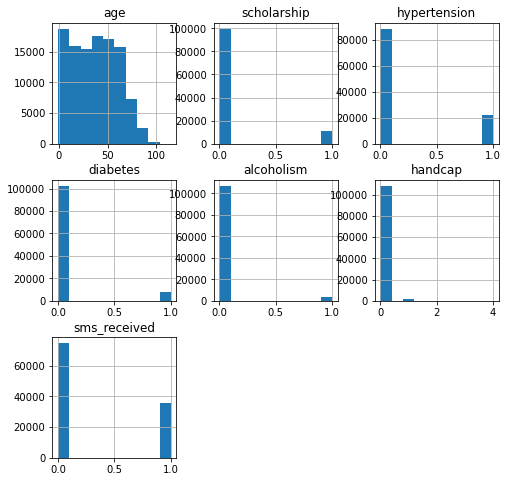

In [19]:
# we first plot a histogram for rhe dataframe to get a better understanding of frequency of our values
df.hist(figsize=(8,8));

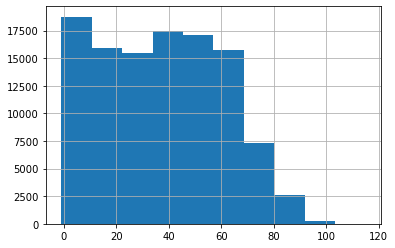

In [20]:
# to take a closer look at age
df['age'].hist();

#### Age in the dataset is obviously skewed to the right with the largest group of people between 0 to 10 years old

### Q1) Is age related to missing appointments?

In [21]:
# to answer Q1
#we create two masks of our data set .. one for people who missed appointments
#the other is for people who showed up
missed = df.query('no_show=="Yes"')
showed = df.query('no_show=="No"')

In [22]:
#we see that around 20% of people who book appointments never show up
missed.shape

(22319, 10)

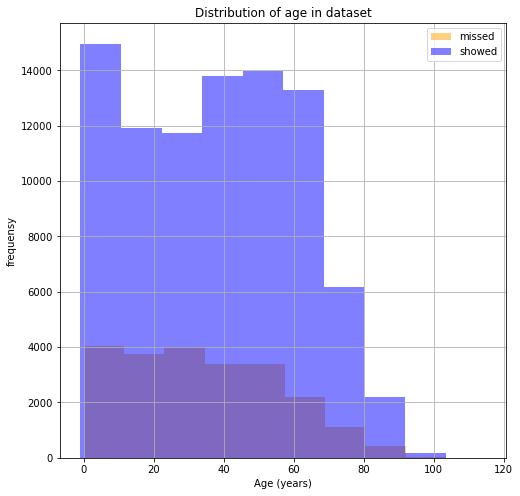

In [23]:
#Now we can plot a histogram of age column for both groups of people
missed['age'].hist(alpha=0.5,label='missed',figsize=(8,8),color='orange')
showed['age'].hist(alpha=0.5,label='showed',figsize=(8,8),color='blue')
plt.legend()
plt.xlabel('Age (years)')
plt.ylabel('frequensy')
plt.title('Distribution of age in dataset');

#### most people who miss appointments are between 0 to 10 years old followed by people in their 30s
#### most people who showed up where between 0 to 10 years old. followed by people in their 50s

### Q2) Is gender related to missing appointments?

In [24]:
# to answer this question, we need to calc counts of showing up or missing appointments based on gender
#then we will get total number of males and females in data set
#finally we will get proportion of missing or attending based on gender as (prop=count/total)

In [25]:
#since we're going to follow this same steps multiple times to answer different questions
#we're going to build a function to provide us with the info of a column 
#and plot a bar chart of oroportion

def get_info(column,name):
    ''' takes column in a dataframe and its name as parameters
        returns counts, totals and proportion of this column
        and plots a bar chart of proportion
     '''
    counts=df.groupby([column,'no_show'])['age'].count()
    totals=df.groupby(column)['age'].count()
    prop=counts/totals
    
    prop.plot(kind='bar',color=['blue','orange'])
    plt.xlabel('{} and showing up cases'.format(name))
    plt.ylabel('proportion')
    plt.title('proportions of people showing up or missing based on {}'.format(name));
    
    return counts,totals,prop

gender  no_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: age, dtype: int64 gender
F    71840
M    38687
Name: age, dtype: int64 gender  no_show
F       No         0.796854
        Yes        0.203146
M       No         0.800321
        Yes        0.199679
Name: age, dtype: float64


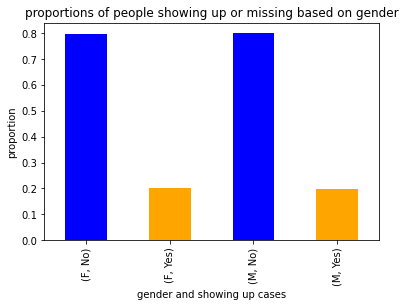

In [26]:
#now, we call the function to analyse the gender column
gen_counts,gen_totals,gen_prop=get_info(df['gender'],'gender')
print(gen_counts,gen_totals,gen_prop)

#### we have a total of 71840 females and 38687 males
#### we clearly see that around 20% of females miss appointments
#### 19.9% of males also miss appointments
#### the result is so close .. so we can't really judge someone showing up or not based on gender

### Q3) Does having a scholarship urge people to show up?


scholarship  no_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: age, dtype: int64 scholarship
0    99666
1    10861
Name: age, dtype: int64 scholarship  no_show
0            No         0.801928
             Yes        0.198072
1            No         0.762637
             Yes        0.237363
Name: age, dtype: float64


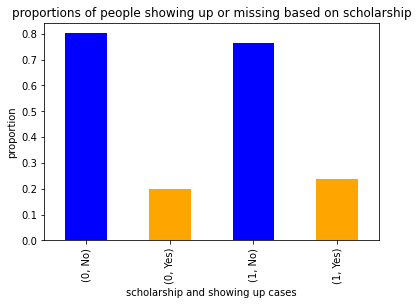

In [27]:
#now, we call the function to analyse the scholarship column
sch_counts,sch_totals,sch_prop=get_info(df['scholarship'],'scholarship')
print(sch_counts,sch_totals,sch_prop)

#### we can see that 19.8% out of 99666 people without scholarships miss appointmesnts
#### while 23.7% out of 10861 people with scholarships miss them 
#### there's no obvious strong relation between having a scholarship and missing appointments

### Q4) Is there a specific neighbourhood where people tend to not show up?


In [28]:
# we get counts of prople who missed appointments in each neighbourhood
missed['neighbourhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
Name: neighbourhood, Length: 80, dtype: int64

In [29]:
# we get counts of people who showed up in each neighbourhood
showed['neighbourhood'].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: neighbourhood, Length: 80, dtype: int64

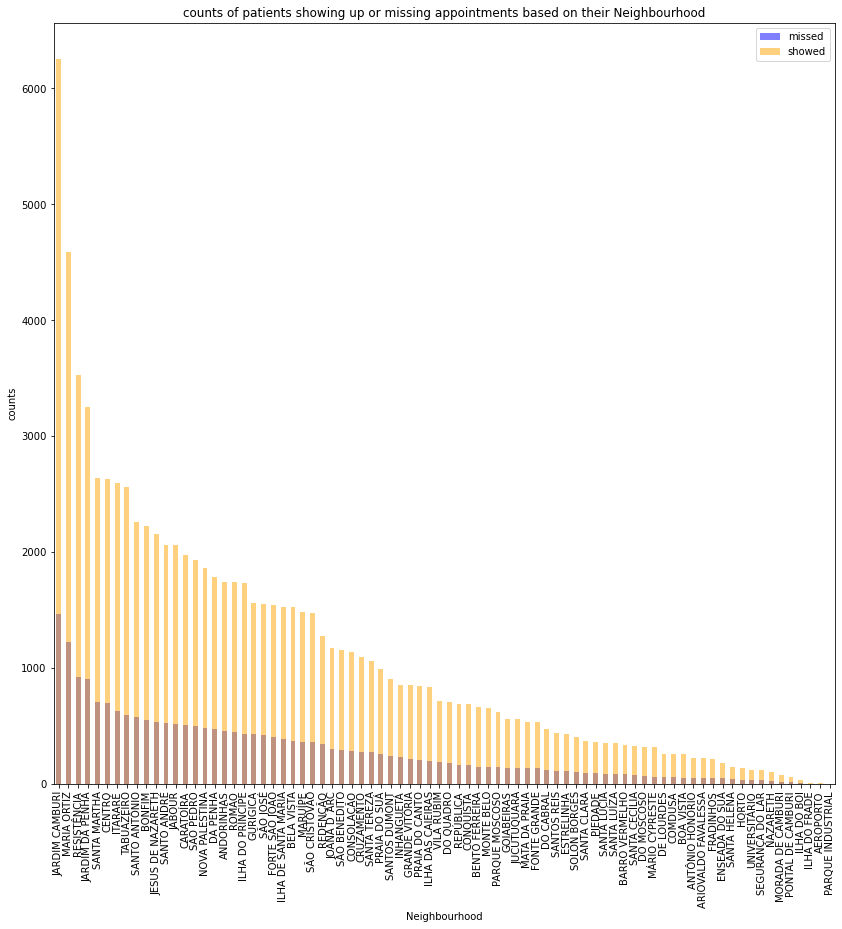

In [30]:
# now we plot both counts on the same chart
missed['neighbourhood'].value_counts().plot(kind='bar',figsize=(14,14),label='missed',alpha=0.5,color='blue')
showed['neighbourhood'].value_counts().plot(kind='bar',figsize=(14,14),label='showed',alpha=0.5,color='orange')
plt.legend()
plt.xlabel('Neighbourhood')
plt.ylabel('counts')
plt.title('counts of patients showing up or missing appointments based on their Neighbourhood');

#### we can see that JARDIM CAMBURI neighbourhood has highest counts for both groups
#### with 1465 missing appointments and 6252 showing up
#### while the minimum number of missing appointments goes to AEROPORTO with 1 app         
#### and a minimum number of showing up goes to PARQUE INDUSTRIAL with 1 app

In [31]:
#but maybe plotting the proportions of missing appointments to the total appointments in each neighbourhood 
#would give us a better understanding
miss_neigh=missed.groupby('neighbourhood')['no_show'].count()
total_neigh=df.groupby('neighbourhood')['no_show'].count()
prop_neigh=miss_neigh/total_neigh
prop_neigh


neighbourhood
AEROPORTO              0.125000
ANDORINHAS             0.230327
ANTÔNIO HONÓRIO        0.184502
ARIOVALDO FAVALESSA    0.219858
BARRO VERMELHO         0.215130
                         ...   
SÃO JOSÉ               0.216490
SÃO PEDRO              0.210376
TABUAZEIRO             0.182950
UNIVERSITÁRIO          0.210526
VILA RUBIM             0.165687
Name: no_show, Length: 81, dtype: float64

In [32]:
# to get the neighbourhood with lowest ratio of missing appointments
prop_neigh.min()


0.08571428571428572

In [33]:
# to get the neighbourhood with highest ratio of missing appointments
prop_neigh.max()

1.0

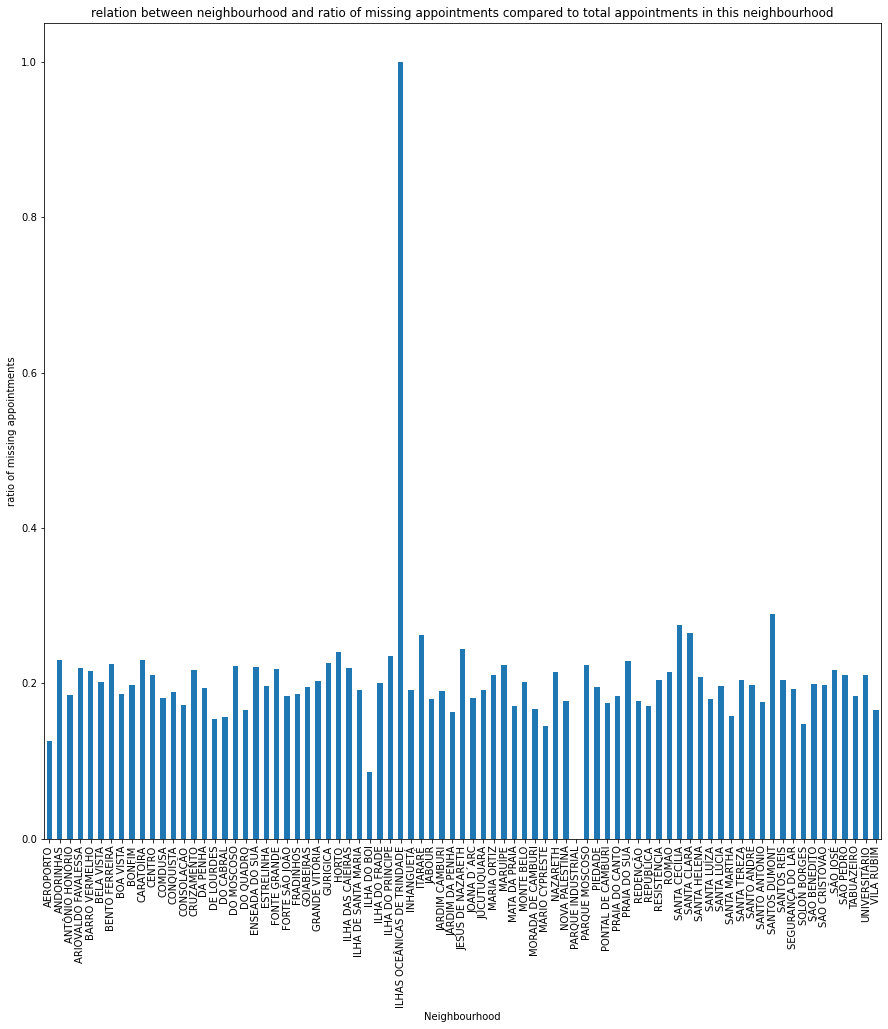

In [34]:
prop_neigh.plot(kind='bar',figsize=(15,15))
plt.xlabel('Neighbourhood')
plt.ylabel('ratio of missing appointments')
plt.title('relation between neighbourhood and ratio of missing appointments compared to total appointments in this neighbourhood');

#### we clearly see that neighbourhood with highest ratio of missing appointments is ILHAS OCEANICAS with 100% missing appointments
#### the neighbourhood with minimum ratio of missing appointments is ILHA DO BOI with only 8.57% missing appointments
#### so clearly neighbourhood of patient can affect whether they show up or miss their appointment

### Q5) Is any of the chronic diseases related to missing appointments (Diabetes-Hypertension-Alcoholism)


### a) we first inspect diabetes

diabetes  no_show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: age, dtype: int64 diabetes
0    102584
1      7943
Name: age, dtype: int64 diabetes  no_show
0         No         0.796372
          Yes        0.203628
1         No         0.819967
          Yes        0.180033
Name: age, dtype: float64


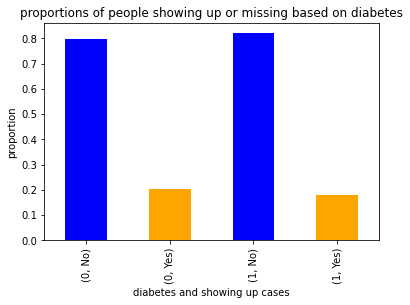

In [35]:
#now, we call the function to analyse the diabetes column
diab_counts,diab_totals,diab_prop=get_info(df['diabetes'],'diabetes')
print(diab_counts,diab_totals,diab_prop)

#### we see that 20.4% out of 102584 healthy people(without diabetes) miss their appointments
#### while 18% out of 7943 diabetic people miss their appointments

### b) second, we inspect Hypertension

hypertension  no_show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: age, dtype: int64 hypertension
0    88726
1    21801
Name: age, dtype: int64 hypertension  no_show
0             No         0.790963
              Yes        0.209037
1             No         0.826980
              Yes        0.173020
Name: age, dtype: float64


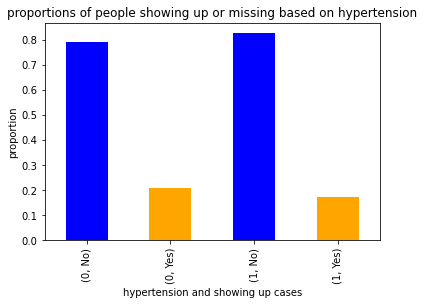

In [36]:
#now, we call the function to analyse the hypertension column
hyp_counts,hyp_totals,hyp_prop=get_info(df['hypertension'],'hypertension')
print(hyp_counts,hyp_totals,hyp_prop)

#### there are 88726 people without hypertension, 20.9% of them don't show up
#### out of 21801 patients with hypertension, 17.3% miss appointments
#### we can't say that Hypertension is an indication for someone showing up or missing appointments

### c) Alcoholism inspection

alcoholism  no_show
0           No         85525
            Yes        21642
1           No          2683
            Yes          677
Name: age, dtype: int64 alcoholism
0    107167
1      3360
Name: age, dtype: int64 alcoholism  no_show
0           No         0.798054
            Yes        0.201946
1           No         0.798512
            Yes        0.201488
Name: age, dtype: float64


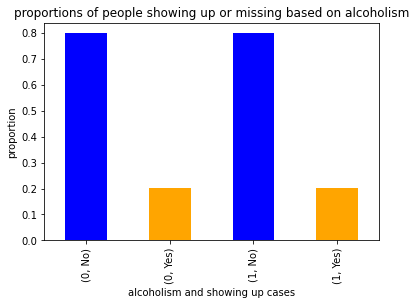

In [37]:
#now, we call the function to analyse the alcoholism column
alc_counts,alc_totals,alc_prop=get_info(df['alcoholism'],'alcoholism')
print(alc_counts,alc_totals,alc_prop)

#### the results are almost identical for this one
####  we have 107167 sober patients, 20.19% of sober people miss their appointments
#### we have 3360 alcoholic patients, 20.15% of them miss their appointments
#### we can't judge a person showing up or missing based on alcoholism status

### Q6) Is it about disabilities? (Handicapped)


In [38]:
#since the dataset has people with dufferent number of disabilities (0,1,2,3,4)
#let's test if ther's any correlation between number of disabilities, showing up and age of the patient

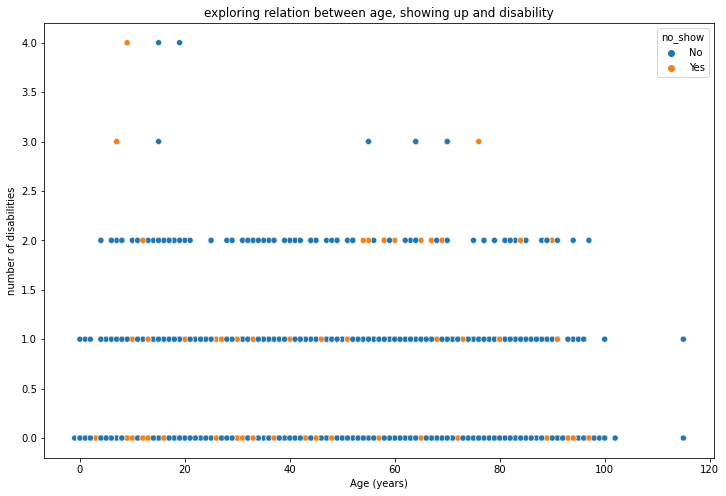

In [39]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

ax=sns.scatterplot(data=df, x="age", y="handcap",hue='no_show')
ax.set_xlabel('Age (years)')
ax.set_ylabel('number of disabilities')
ax.set_title('exploring relation between age, showing up and disability');

#### looks like showing up or missing appointments isn't necessirly correlated to num of disabilities
#### age also doesn't have much to do with num of disabilities as the number is distributed along a wide range of age
#### except that the 3 people with 4 disabilities are between 10 to 20 years old, the youngest of them missed app

handcap  no_show
0        No         86374
         Yes        21912
1        No          1676
         Yes          366
2        No           146
         Yes           37
3        No            10
         Yes            3
4        No             2
         Yes            1
Name: age, dtype: int64 handcap
0    108286
1      2042
2       183
3        13
4         3
Name: age, dtype: int64 handcap  no_show
0        No         0.797647
         Yes        0.202353
1        No         0.820764
         Yes        0.179236
2        No         0.797814
         Yes        0.202186
3        No         0.769231
         Yes        0.230769
4        No         0.666667
         Yes        0.333333
Name: age, dtype: float64


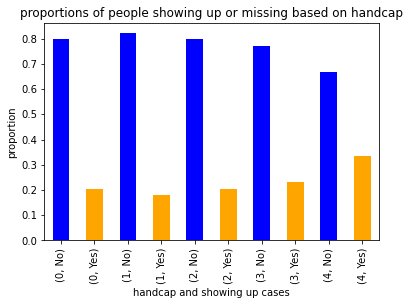

In [40]:
#now, we call the function to analyse the disability column
hand_counts,hand_totals,hand_prop=get_info(df['handcap'],'handcap')
print(hand_counts,hand_totals,hand_prop)

#### 108286 patients don't have any disability, 20.23% of them miss appointments
#### 2042 patients have only one disability, 17.9% of them miss appointments
#### 183 patients have two disabilities, out of which 20.22% miss appointments
#### 13 patients have 3 disabilities, 23.08% of them don't show up
#### only 3 people have 4 disabilities, 33.3% of them miss appointments


### Q7)Does receving an sms encourage people to show up?

sms_received  no_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: age, dtype: int64 sms_received
0    75045
1    35482
Name: age, dtype: int64 sms_received  no_show
0             No         0.832967
              Yes        0.167033
1             No         0.724255
              Yes        0.275745
Name: age, dtype: float64


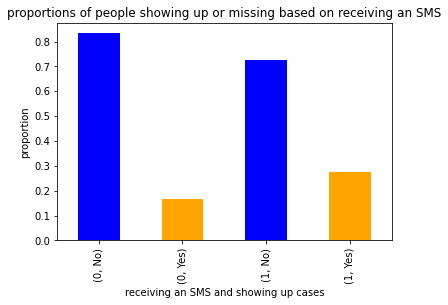

In [41]:
#now, we call the function to analyse the SMS column
sms_counts,sms_totals,sms_prop=get_info(df['sms_received'],'receiving an SMS')
print(sms_counts,sms_totals,sms_prop)

#### 75045 patients didn't receive an SMS, 16.7% of them missed appointments
#### 35482 received an sms, 27.6% of them didn't show up 
#### which is quite strange

<a id='conclusions'></a>
# Conclusions


## Limitations:
### our data didn't have any missing values nor duplicate rows
### we found four columns with nonsuitable datatypes but we dropped (not relevent to analysis)
### we changed column labels to lower case and used '_' instead of  '-'. we also changed misspelled names
### we had an outlier at age= -1 so we dropped this row
## Questions we explored:
### Is people showing up or missing appointments related to any of the data features?

## statistical results:
* Age analysis:
  * Age in the dataset is obviously skewed to the right with the largest group of people between 0 to 10 years old
  * most people who miss appointments are between 0 to 10 years old followed by people in their 30s
  * most people who showed up where between 0 to 10 years old. followed by people in their 50s
* gender analysis:
  * we have a total of 71840 females and 38687 males
  * around 20% of females miss appointments
  * 19.9% of males also miss appointments
* scolarship analysis:
  * 19.8% out of 99666 people without scholarships miss appointmesnts
  * 23.7% out of 10861 people with scholarships miss them
* diabetes analysis:
  * 20.4% out of 102584 healthy people(without diabetes) miss their appointments
  * 18% out of 7943 diabetic people miss their appointments
* Hypertension analysis:
  * there are 88726 people without hypertension, 20.9% of them don't show up
  * out of 21801 patients with hypertension, 17.3% miss appointments
* Alcoholism analysis:
  * 107167 sober patients, 20.19% of sober people miss their appointments
  * 3360 alcoholic patients, 20.15% of them miss their appointments
* disability analysis:
  * 108286 patients don't have any disability, 20.23% of them miss appointments
  * 2042 patients have only one disability, 17.9% of them miss appointments
  * 183 patients have two disabilities, out of which 20.22% miss appointments
  * 13 patients have 3 disabilities, 23.08% of them don't show up
  * only 3 people have 4 disabilities, 33.3% of them miss appointments
* SMS analysis:
  * 75045 patients didn't receive an SMS, 16.7% of them missed appointments
  * 35482 received an sms, 27.6% of them didn't show up
* neighbourhood analysis:
  * JARDIM CAMBURI neighbourhood has highest counts for both groups with 1465 missing appointments and 6252 showing up
  * the minimum number of missing appointments goes to AEROPORTO with 1 app
  * a minimum number of showing up goes to PARQUE INDUSTRIAL with 1 app
  * neighbourhood with highest ratio of missing appointments is ILHAS OCEANICAS with 100% missing appointments
  * the neighbourhood with minimum ratio of missing appointments is ILHA DO BOI with only 8.57% missing appointment


## final results:
### we couldn't find a strong relation between people missing their appointments and the following features (gender-scholarshop-diabetes-Hypertension-Alcoholism-receiving an sms-disabilitiy)
### we found that missing appointments differs clearly with the patient's neighbourhood and identified the neighbourhood with highest and lowest missing appointments ratio
### 